<a href="https://colab.research.google.com/github/s34836/EWD/blob/main/Lab_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Clustering

1. Load the `housing.csv` dataset. Drop all rows containing missing values. Encode categorical variables using `pd.get_dummies()`. Scale the data.
    - Cluster the data using [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
    - Create a plot showing the dependence of WCSS (available under `inertia_`) on `n_clusters`. Use the plot to select the number of clusters.
    - Visualize the clustered data. For example, you can create a scatterplot with `longitude` on the x axis and `latitude` on the y axis, with colors assigned to cluster labels.
    - Cluster the data using [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). The number of clusters can be selected using the `n_clusters` or `distance_threshold` parameters. Compare visually the clusterings created by k-means and hierarchical clustering.


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('housing.csv')

# Drop rows with missing values
df = df.dropna()
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True, dtype='int64')

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


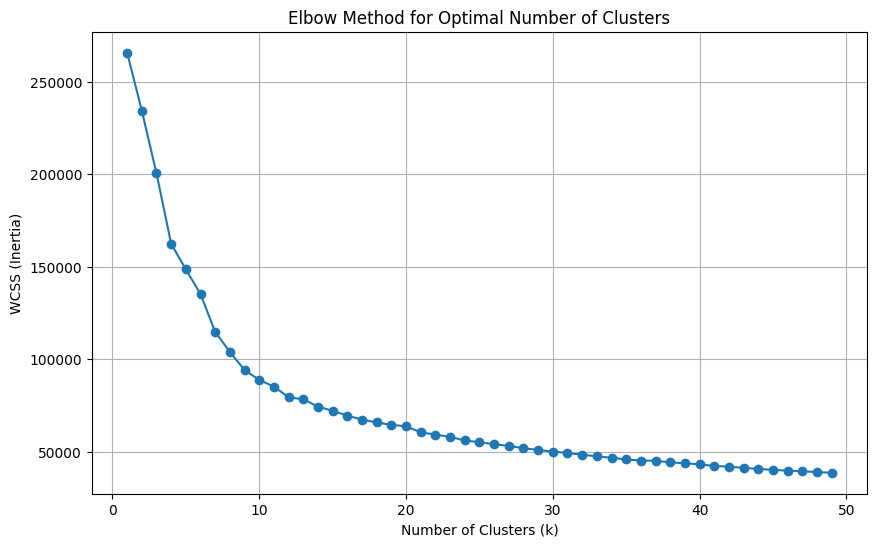

In [44]:
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
k_range = range(1, 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Create elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# Print WCSS values
#for k, w in zip(k_range, wcss):
#    print(f"k={k}: WCSS={w:.2f}")

no to k = 4, ale k =5 też może być

ale jak więcej szczegółow to 8-10 może.

In [21]:
from sklearn.cluster import KMeans

# Cluster the data using KMeans
kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df['cluster'] = clusters

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,0


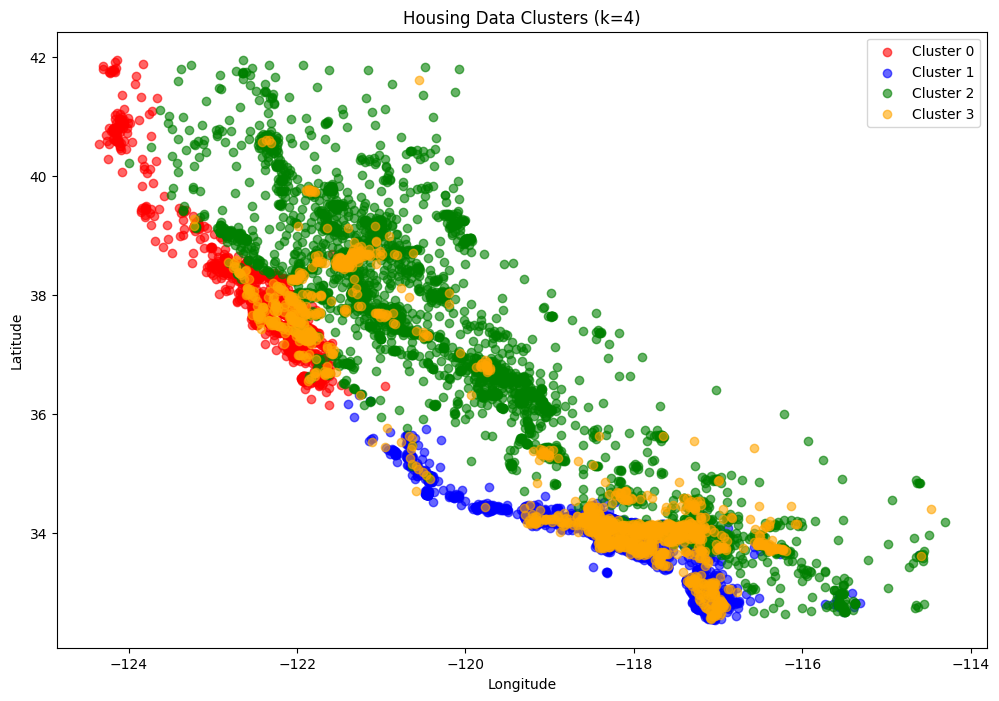

In [31]:
import matplotlib.pyplot as plt

# k=4
kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters


plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Data Clusters (k=4)')
plt.legend()
plt.show()


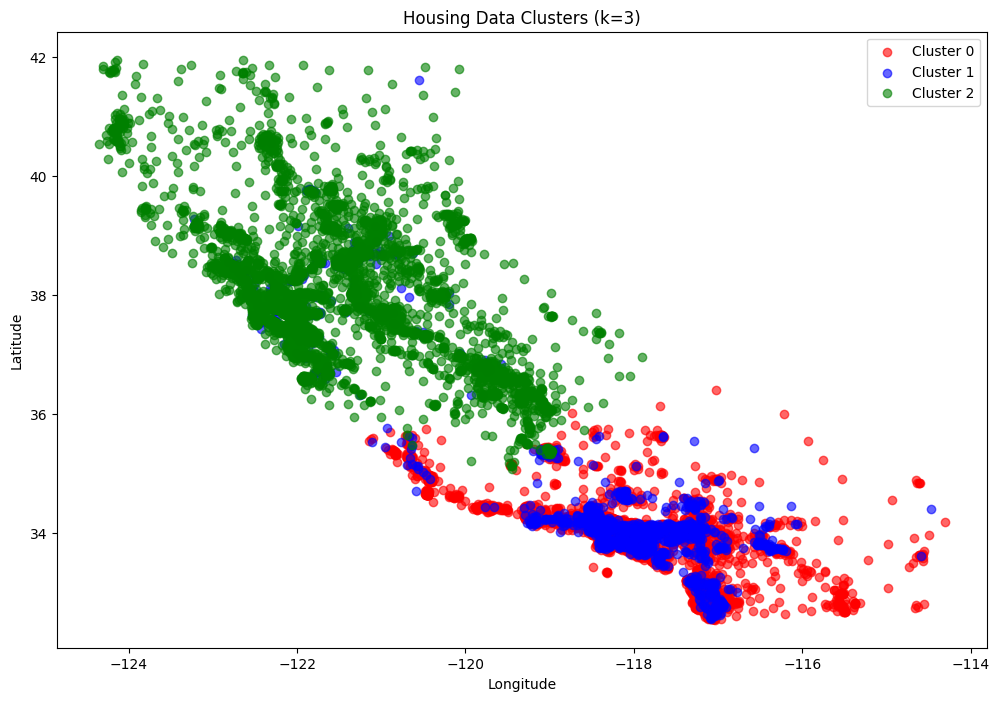

In [36]:
import matplotlib.pyplot as plt

# k=3
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters


plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange']
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Data Clusters (k=3)')
plt.legend()
plt.show()

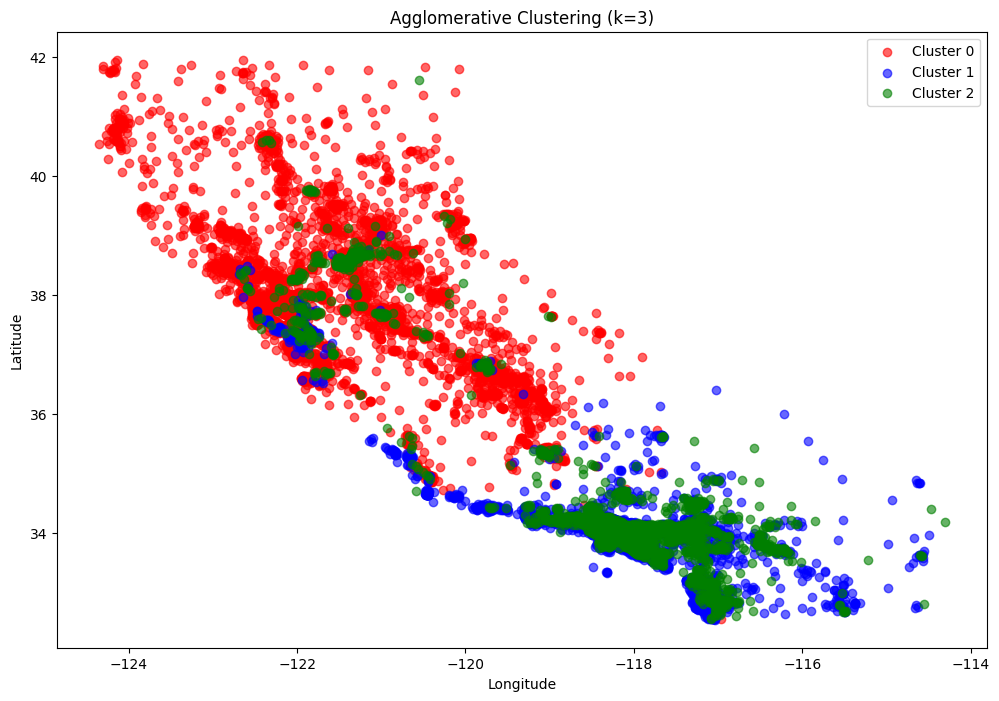

In [37]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(df_scaled)
df['agg_cluster'] = agg_clusters

# Visualize results
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df[df['agg_cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Agglomerative Clustering (k=3)')
plt.legend()
plt.show()

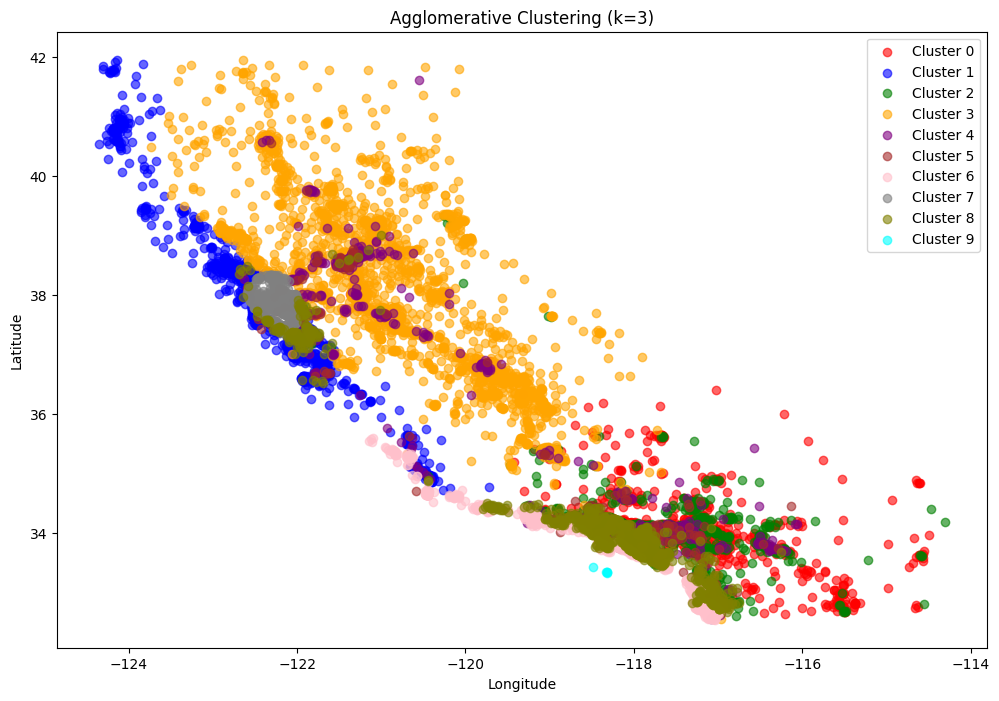

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_clusters = agg_clustering.fit_predict(df_scaled)
df['agg_cluster'] = agg_clusters

# Visualize results
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(10):
    cluster_data = df[df['agg_cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Agglomerative Clustering (k=3)')
plt.legend()
plt.show()

Found 10 clusters


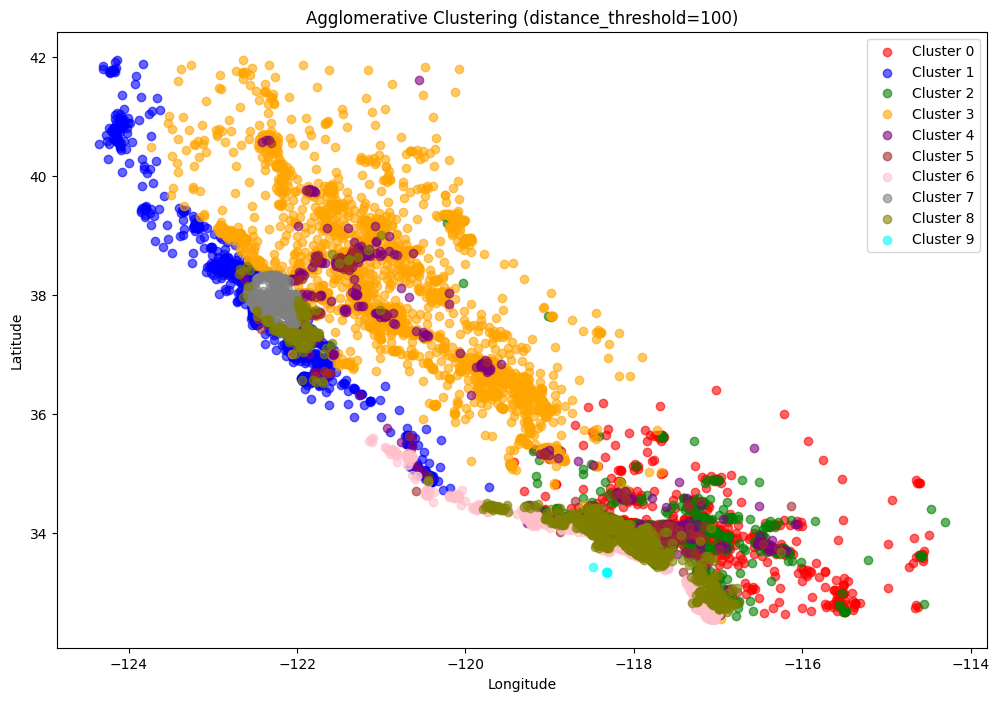

In [45]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with distance threshold
agg_clustering = AgglomerativeClustering(distance_threshold=110, n_clusters=None)
agg_clusters = agg_clustering.fit_predict(df_scaled)
n_clusters_found = len(set(agg_clusters))
print(f"Found {n_clusters_found} clusters")

# Add cluster labels to dataframe
df['agg_cluster'] = agg_clusters

# Visualize results
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(n_clusters_found):
    cluster_data = df[df['agg_cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'],
                c=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Agglomerative Clustering (distance_threshold=100)')
plt.legend()
plt.show()